 # Challenge type generation

## 1. Define probabilities

Influenced by :

<img height="400" src="https://duo.com/assets/img/blogv2/sota-2021-second-factors-used.png" width="1000"/>

Source: https://duo.com/blog/the-2021-state-of-the-auth-report-2fa-climbs-password-managers-biometrics-trend

In [1]:
age_groups <- c("<20", "20-24", "25-29", "30-34", "35-39", "40-44", "45-49", "50-54", "55-59", ">=60")

method_probs <- list(
   "<20"   = c(0.45, 0.35, 0.15, 0.05),
   "20-24" = c(0.4, 0.35, 0.2, 0.05),
   "25-29" = c(0.35, 0.35, 0.2, 0.1),
   "30-34" = c(0.3, 0.3, 0.25, 0.15),
   "35-39" = c(0.3, 0.25, 0.3, 0.15),
   "40-44" = c(0.25, 0.25, 0.4, 0.1),
   "45-49" = c(0.2, 0.2, 0.4, 0.2),
   "50-54" = c(0.15, 0.2, 0.4, 0.25),
   "55-59" = c(0.1, 0.15, 0.4, 0.35),
   ">=60"  = c(0.05, 0.1, 0.45, 0.4)
)

methods <- c("SMS", "EMAIL", "OTP", "ID")

## 2. Generate challenges

In [2]:
bounds <- c(0, 20, 24, 29, 34, 39, 44, 49, 54, 59, Inf)

generate_challenge <- function(age) {
  age_group <- cut(age, breaks = bounds, labels = age_groups)
  challenge <- sample(methods, size=1, replace = TRUE, prob=unlist(method_probs[age_group]))
  return(challenge)
}

In [3]:
temp_data <- read.csv("../workingsets/temp_age_gender_status_salary_bank_activity_amount.csv", header=TRUE)

age <- as.numeric(temp_data$age)

new_challenges <- lapply(seq_len(length(age)), function(i) {
  generate_challenge(age[i])
})

new_ages_genders_statuses_banks_activities_amounts_challenges <- data.frame(age = temp_data$age, gender = temp_data$gender, status = temp_data$status, salary = temp_data$salary, bank = temp_data$bank, activity = temp_data$activity, amount = temp_data$amount, challenge = unlist(new_challenges))

## 3. Plot challenge repartition


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




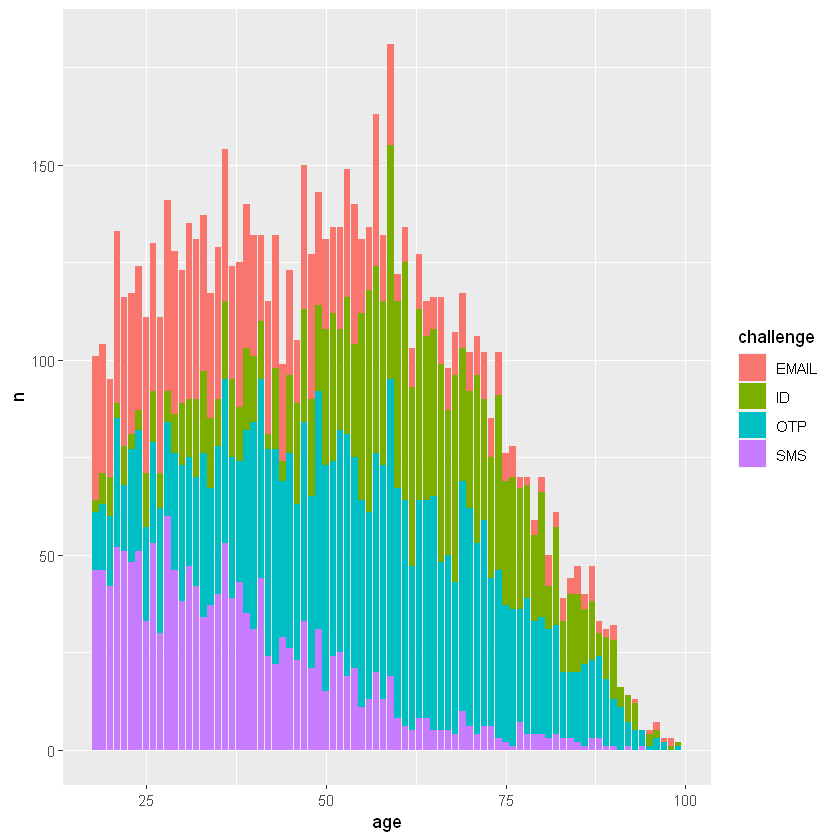

In [4]:
library(ggplot2)
library(dplyr)
new_ages_genders_statuses_banks_activities_amounts_challenges$challenge <- as.character(new_ages_genders_statuses_banks_activities_amounts_challenges$challenge)
counts <- new_ages_genders_statuses_banks_activities_amounts_challenges %>% count(age, challenge)
ggplot(counts, aes(x = age, y = n, fill = challenge)) + geom_col()

## 4. Export generated data

In [5]:
write.csv(new_ages_genders_statuses_banks_activities_amounts_challenges, file = "../workingsets/temp_age_gender_status_salary_bank_activity_amount_challenge.csv")